In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [6]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [7]:
data= pd.read_csv(r"D:\ten organism\train data\ganji bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_ganji.csv")

In [8]:
data.isnull().values.any()

False

In [9]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.46,-1.44,-2.81,-1.44,-2.81,-1.95,-1.95,-2.18,-1.76,-1.46,...,-2.18,-1.76,-1.42,-2.81,-1.95,-1.52,-1.46,-1.76,-2.18,1
1,-1.46,-2.18,-1.76,-1.44,-1.95,-1.95,-2.17,-2.18,-1.44,-1.95,...,-1.46,-2.18,-1.95,-2.81,-1.44,-2.81,-1.44,-1.95,-2.17,1
2,-1.52,-2.17,-1.95,-1.44,-2.81,-1.44,-2.18,-1.95,-1.95,-1.46,...,-1.42,-1.76,-2.18,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44,1
3,-1.46,-2.99,-1.42,-1.76,-2.18,-1.95,-2.17,-1.95,-1.95,-1.52,...,-2.18,-1.44,-2.17,-1.44,-1.76,-2.18,-1.46,-2.99,-1.76,1
4,-1.52,-1.95,-2.17,-1.95,-2.18,-1.46,-1.95,-1.52,-2.81,-1.44,...,-1.42,-2.18,-1.95,-1.46,-2.18,-1.95,-1.95,-1.95,-1.95,1


In [10]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-1.46,-2.81,-1.52,-2.17,-2.18,-1.44,-2.17,-1.95,-1.95,-1.52,...,-1.46,-2.99,-1.76,-1.42,-1.76,-1.76,-2.18,-1.95,-1.46,-2.81
1,-1.76,-2.18,-1.46,-2.18,-1.95,-1.46,-1.76,-2.18,-1.95,-2.81,...,-1.44,-2.99,-1.76,-1.42,-2.99,-1.44,-2.17,-1.52,-2.81,-1.42
2,-1.44,-1.76,-2.18,-1.95,-1.46,-2.18,-2.81,-1.44,-1.95,-2.81,...,-1.95,-1.95,-2.81,-1.44,-1.46,-2.99,-1.46,-1.95,-1.44,-2.18
3,-2.81,-1.44,-2.18,-1.95,-2.17,-1.95,-1.95,-1.44,-2.81,-1.95,...,-1.42,-2.99,-1.46,-1.44,-2.99,-1.46,-1.95,-1.95,-1.52,-1.95
4,-1.95,-1.95,-1.46,-2.18,-2.81,-1.42,-2.99,-1.46,-2.18,-1.46,...,-1.46,-2.18,-1.46,-1.44,-2.18,-2.17,-1.44,-2.18,-2.17,-1.52


### Preprocessing Promoter data

In [11]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [12]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [13]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [14]:
promoter_without_label['label']=1

In [15]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [16]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-1.46,-2.81,-1.52,-2.17,-2.18,-1.44,-2.17,-1.95,-1.95,-1.52,...,-1.46,-2.99,-1.76,-1.42,-1.76,-1.76,-2.18,-1.95,-1.46,-2.81
1,-1.76,-2.18,-1.46,-2.18,-1.95,-1.46,-1.76,-2.18,-1.95,-2.81,...,-1.44,-2.99,-1.76,-1.42,-2.99,-1.44,-2.17,-1.52,-2.81,-1.42
2,-1.44,-1.76,-2.18,-1.95,-1.46,-2.18,-2.81,-1.44,-1.95,-2.81,...,-1.95,-1.95,-2.81,-1.44,-1.46,-2.99,-1.46,-1.95,-1.44,-2.18
3,-2.81,-1.44,-2.18,-1.95,-2.17,-1.95,-1.95,-1.44,-2.81,-1.95,...,-1.42,-2.99,-1.46,-1.44,-2.99,-1.46,-1.95,-1.95,-1.52,-1.95
4,-1.95,-1.95,-1.46,-2.18,-2.81,-1.42,-2.99,-1.46,-2.18,-1.46,...,-1.46,-2.18,-1.46,-1.44,-2.18,-2.17,-1.44,-2.18,-2.17,-1.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-2.17,-1.95,-1.44,-2.99,-1.46,-1.44,-1.76,-2.81,-1.95,-1.44,...,-1.46,-2.18,-1.46,-2.81,-1.95,-1.44,-2.99,-1.76,-1.76,-1.44
14665,-2.18,-1.95,-1.46,-2.81,-2.18,-1.44,-2.81,-1.76,-1.44,-1.46,...,-2.17,-1.95,-1.52,-2.81,-1.46,-2.18,-1.76,-1.46,-1.52,-2.81
14666,-1.95,-1.95,-1.95,-1.95,-1.44,-1.76,-2.99,-1.42,-2.81,-1.52,...,-1.95,-1.52,-1.46,-2.18,-2.81,-1.44,-1.46,-2.81,-1.95,-1.44
14667,-1.42,-2.18,-1.95,-2.17,-1.44,-1.76,-2.18,-1.95,-1.46,-2.18,...,-1.52,-2.17,-1.95,-1.95,-1.95,-1.95,-1.52,-2.81,-1.44,-2.81


In [17]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [18]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.46,-2.81,-1.52,-2.17,-2.18,-1.44,-2.17,-1.95,-1.95,-1.52,...,-2.99,-1.76,-1.42,-1.76,-1.76,-2.18,-1.95,-1.46,-2.81,0
1,-1.76,-2.18,-1.46,-2.18,-1.95,-1.46,-1.76,-2.18,-1.95,-2.81,...,-2.99,-1.76,-1.42,-2.99,-1.44,-2.17,-1.52,-2.81,-1.42,0
2,-1.44,-1.76,-2.18,-1.95,-1.46,-2.18,-2.81,-1.44,-1.95,-2.81,...,-1.95,-2.81,-1.44,-1.46,-2.99,-1.46,-1.95,-1.44,-2.18,0
3,-2.81,-1.44,-2.18,-1.95,-2.17,-1.95,-1.95,-1.44,-2.81,-1.95,...,-2.99,-1.46,-1.44,-2.99,-1.46,-1.95,-1.95,-1.52,-1.95,0
4,-1.95,-1.95,-1.46,-2.18,-2.81,-1.42,-2.99,-1.46,-2.18,-1.46,...,-2.18,-1.46,-1.44,-2.18,-2.17,-1.44,-2.18,-2.17,-1.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-2.17,-1.95,-1.44,-2.99,-1.46,-1.44,-1.76,-2.81,-1.95,-1.44,...,-2.18,-1.46,-2.81,-1.95,-1.44,-2.99,-1.76,-1.76,-1.44,0
14665,-2.18,-1.95,-1.46,-2.81,-2.18,-1.44,-2.81,-1.76,-1.44,-1.46,...,-1.95,-1.52,-2.81,-1.46,-2.18,-1.76,-1.46,-1.52,-2.81,0
14666,-1.95,-1.95,-1.95,-1.95,-1.44,-1.76,-2.99,-1.42,-2.81,-1.52,...,-1.52,-1.46,-2.18,-2.81,-1.44,-1.46,-2.81,-1.95,-1.44,0
14667,-1.42,-2.18,-1.95,-2.17,-1.44,-1.76,-2.18,-1.95,-1.46,-2.18,...,-2.17,-1.95,-1.95,-1.95,-1.95,-1.52,-2.81,-1.44,-2.81,0


### Plotting Graph

In [19]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [20]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,-1.954591
1,-79,-1.960165
2,-78,-1.966735
3,-77,-1.954670
4,-76,-1.958529
...,...,...
94,14,-1.950377
95,15,-1.944175
96,16,-1.963481
97,17,-1.951034


In [21]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,-1.961008,150
1,-79,-1.967088,151
2,-78,-1.964322,152
3,-77,-1.961254,153
4,-76,-1.970356,154
...,...,...,...
94,14,-1.980517,244
95,15,-1.960736,245
96,16,-1.958850,246
97,17,-1.979881,247


In [22]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [23]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


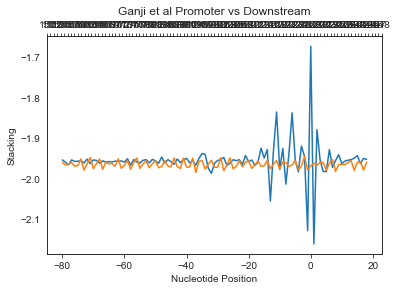

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'])

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Ganji et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [25]:
data= pd.concat([promoter,downstream])

In [26]:
data.reset_index(drop=True, inplace=True)

In [27]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.46,-1.44,-2.81,-1.44,-2.81,-1.95,-1.95,-2.18,-1.76,-1.46,...,-2.18,-1.76,-1.42,-2.81,-1.95,-1.52,-1.46,-1.76,-2.18,1
1,-1.46,-2.18,-1.76,-1.44,-1.95,-1.95,-2.17,-2.18,-1.44,-1.95,...,-1.46,-2.18,-1.95,-2.81,-1.44,-2.81,-1.44,-1.95,-2.17,1
2,-1.52,-2.17,-1.95,-1.44,-2.81,-1.44,-2.18,-1.95,-1.95,-1.46,...,-1.42,-1.76,-2.18,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44,1
3,-1.46,-2.99,-1.42,-1.76,-2.18,-1.95,-2.17,-1.95,-1.95,-1.52,...,-2.18,-1.44,-2.17,-1.44,-1.76,-2.18,-1.46,-2.99,-1.76,1
4,-1.52,-1.95,-2.17,-1.95,-2.18,-1.46,-1.95,-1.52,-2.81,-1.44,...,-1.42,-2.18,-1.95,-1.46,-2.18,-1.95,-1.95,-1.95,-1.95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,-2.17,-1.95,-1.44,-2.99,-1.46,-1.44,-1.76,-2.81,-1.95,-1.44,...,-2.18,-1.46,-2.81,-1.95,-1.44,-2.99,-1.76,-1.76,-1.44,0
29334,-2.18,-1.95,-1.46,-2.81,-2.18,-1.44,-2.81,-1.76,-1.44,-1.46,...,-1.95,-1.52,-2.81,-1.46,-2.18,-1.76,-1.46,-1.52,-2.81,0
29335,-1.95,-1.95,-1.95,-1.95,-1.44,-1.76,-2.99,-1.42,-2.81,-1.52,...,-1.52,-1.46,-2.18,-2.81,-1.44,-1.46,-2.81,-1.95,-1.44,0
29336,-1.42,-2.18,-1.95,-2.17,-1.44,-1.76,-2.18,-1.95,-1.46,-2.18,...,-2.17,-1.95,-1.95,-1.95,-1.95,-1.52,-2.81,-1.44,-2.81,0


# Prediction using machine learning

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve,auc, RocCurveDisplay
from statistics import mean
import sklearn.metrics as metrics
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, matthews_corrcoef, confusion_matrix

In [29]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [30]:
feature_list=list(X_train.columns)

In [31]:
#'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300

In [32]:
X.shape

(29338, 99)

## Model Training

In [33]:
kfold = KFold(n_splits=10, shuffle=True)
clf = svm.SVC(kernel='rbf')
fold_no = 1

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

    inputs = np.concatenate((X_train, X_test), axis=0)
    targets = np.concatenate((y_train, y_test), axis=0)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)
    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))
    
    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)
    
    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))
    
    fold_no += 1

Fold 1: Accuracy: 0.7416496250852079, Precision: 0.7317232375979112, Recall: 0.7636239782016349, F1 Score: 0.7473333333333334, MCC: 0.4837442379872825, Specificity: 0.7196452933151433
Fold 2: Accuracy: 0.7314246762099523, Precision: 0.7339390006489293, Recall: 0.7495029821073559, F1 Score: 0.7416393442622949, MCC: 0.4621827778381636, Specificity: 0.712280701754386
Fold 3: Accuracy: 0.7368779822767553, Precision: 0.7175368139223561, Recall: 0.7538677918424754, F1 Score: 0.7352537722908095, MCC: 0.47462423901141004, Specificity: 0.7208994708994709
Fold 4: Accuracy: 0.7355146557600545, Precision: 0.7300970873786408, Recall: 0.7585743106926698, F1 Score: 0.7440633245382584, MCC: 0.47101440224058416, Specificity: 0.7118175535590877
Fold 5: Accuracy: 0.7351738241308794, Precision: 0.7176015473887815, Recall: 0.7665289256198347, F1 Score: 0.7412587412587411, MCC: 0.47173170811617265, Specificity: 0.7044534412955465
Fold 6: Accuracy: 0.7443762781186094, Precision: 0.7213220998055736, Recall: 0

In [34]:
accuracy_list

[0.7416496250852079,
 0.7314246762099523,
 0.7368779822767553,
 0.7355146557600545,
 0.7351738241308794,
 0.7443762781186094,
 0.7266530334014997,
 0.7252897068847989,
 0.7442891237640641,
 0.7449710194340265]

In [35]:
precision_list

[0.7317232375979112,
 0.7339390006489293,
 0.7175368139223561,
 0.7300970873786408,
 0.7176015473887815,
 0.7213220998055736,
 0.712258064516129,
 0.7262135922330097,
 0.7352368591823492,
 0.7379356568364611]

In [36]:
recall_list

[0.7636239782016349,
 0.7495029821073559,
 0.7538677918424754,
 0.7585743106926698,
 0.7665289256198347,
 0.776692254012561,
 0.7561643835616438,
 0.7455149501661129,
 0.768135593220339,
 0.7551440329218106]

In [37]:
specificity_list

[0.7196452933151433,
 0.712280701754386,
 0.7208994708994709,
 0.7118175535590877,
 0.7044534412955465,
 0.7135243171219188,
 0.6974219810040706,
 0.7039888033589923,
 0.720164609053498,
 0.7349152542372881]

In [38]:
f1_score_list 

[0.7473333333333334,
 0.7416393442622949,
 0.7352537722908095,
 0.7440633245382584,
 0.7412587412587411,
 0.7479838709677419,
 0.7335548172757475,
 0.7357377049180328,
 0.7513262599469496,
 0.7464406779661017]

In [39]:
mcc_list

[0.4837442379872825,
 0.4621827778381636,
 0.47462423901141004,
 0.47101440224058416,
 0.47173170811617265,
 0.4907438901011511,
 0.4543089222649932,
 0.4499894400058309,
 0.4889233055813996,
 0.49012515667576395]

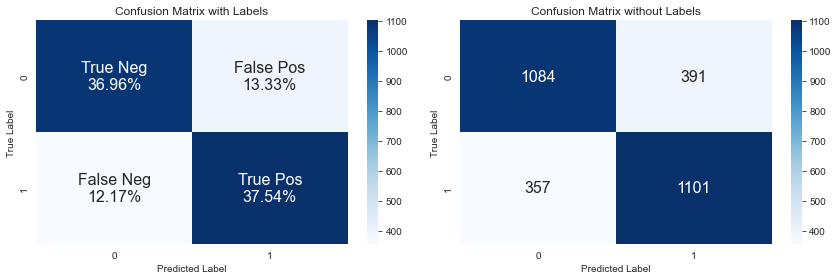

In [40]:
train_cm= confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [41]:
print(mean(accuracy_list))

0.7366219925065848


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


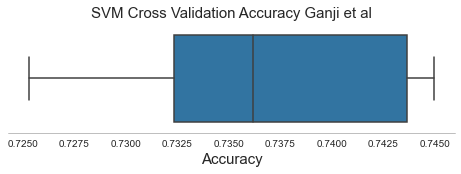

In [42]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('SVM Cross Validation Accuracy Ganji et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


In [43]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
print("f1_score:",metrics.f1_score(testY, y_pred))

Accuracy: 0.7449710194340265
Precision: 0.7379356568364611
Recall: 0.7551440329218106
f1_score: 0.7464406779661017


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


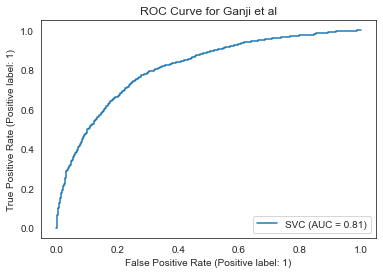

In [44]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Ganji et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


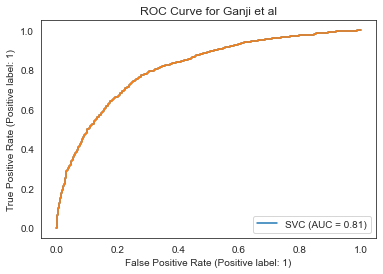

In [45]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

roc_df.to_csv('d:/ROC Curve data/downstream_ganji_svm_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [65]:
!pip install shap

In [66]:
import shap


In [67]:
promoter.shape

(14669, 100)

### X_PCA promotor

In [68]:
import random

# set the random seed to ensure reproducibility
#random.seed(123)

# generate 40 random numbers between 1 to 15000
random_numbers = [random.randint(1, 10000) for _ in range(40)]

# print the random numbers
print(random_numbers)


[8081, 2132, 8982, 4223, 9217, 7124, 339, 9222, 9621, 4958, 2580, 3559, 6928, 7030, 6772, 9517, 156, 3509, 5088, 5143, 7997, 6396, 2568, 1593, 9692, 5680, 3230, 4048, 2484, 9609, 1561, 8603, 9344, 2240, 4419, 2961, 8854, 1297, 6368, 1698]


In [69]:
X_PCA_promoters = X.loc[[8499, 6345, 8807, 5017, 2395, 4771, 6378, 6038, 2073, 8765, 
                         5534, 8473, 1959, 2733, 9656, 6329, 7081, 1017, 2229, 7451, 338, 5727, 7369, 7392, 4978, 7029, 463, 2599, 8546, 
                         5323, 8468, 8434, 9119, 2251, 5630, 8195, 1717, 8937, 6046, 3685]]

In [70]:
X_PCA_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
8499,-2.17,-2.18,-1.76,-1.44,-2.81,-1.44,-1.46,-2.99,-1.46,-2.18,...,-2.99,-1.42,-2.99,-1.76,-1.42,-1.76,-2.18,-2.81,-1.42,-2.99
6345,-2.81,-1.44,-2.81,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-2.18,...,-1.44,-1.95,-1.46,-2.18,-1.46,-2.81,-1.44,-1.76,-2.18,-1.46
8807,-1.44,-1.76,-2.99,-1.42,-2.99,-1.46,-1.44,-1.76,-2.18,-1.46,...,-1.95,-1.44,-1.76,-2.99,-1.42,-2.18,-2.17,-1.95,-1.95,-2.18
5017,-2.81,-1.44,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44,-2.81,-1.52,...,-2.81,-1.76,-1.42,-2.18,-2.81,-1.76,-1.42,-2.81,-1.95,-2.18
2395,-1.44,-1.46,-2.18,-1.46,-2.81,-2.18,-1.44,-1.46,-1.76,-1.76,...,-2.17,-1.95,-1.52,-2.17,-1.95,-2.18,-1.46,-1.95,-1.95,-1.95
4771,-1.46,-2.81,-1.44,-2.18,-2.81,-1.46,-1.95,-1.44,-1.76,-2.99,...,-2.18,-1.76,-1.76,-1.44,-2.81,-1.42,-2.18,-2.17,-1.44,-2.99
6378,-2.18,-1.46,-1.76,-2.99,-1.44,-2.81,-1.44,-1.95,-2.17,-1.52,...,-1.76,-2.99,-1.44,-1.95,-2.81,-1.46,-1.52,-1.95,-2.17,-1.44
6038,-1.46,-1.52,-2.17,-2.18,-1.46,-1.52,-2.81,-1.46,-1.52,-2.17,...,-1.52,-2.17,-1.95,-2.18,-1.46,-2.18,-1.42,-2.18,-2.17,-1.52
2073,-1.42,-2.81,-1.52,-1.46,-2.99,-1.44,-1.46,-2.99,-1.44,-2.81,...,-2.17,-2.18,-1.44,-1.95,-2.17,-1.95,-1.95,-1.52,-2.17,-2.18
8765,-1.44,-1.95,-2.17,-1.52,-2.81,-1.76,-1.44,-2.17,-2.18,-1.76,...,-2.17,-1.44,-2.99,-1.76,-1.46,-1.95,-2.18,-1.46,-1.52,-2.17


In [71]:
explainer = shap.KernelExplainer(clf.predict, X_PCA_promoters)
shap_values = explainer.shap_values(X_PCA_promoters)

  0%|          | 0/40 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight

In [72]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

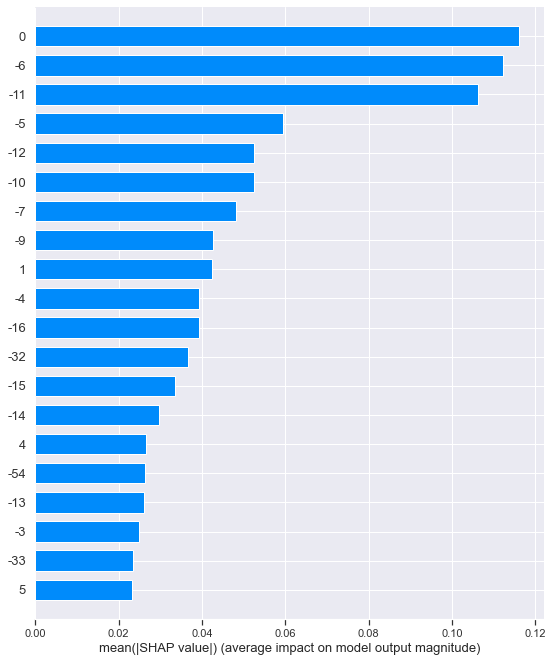

In [73]:
shap.summary_plot(shap_values,X_PCA_promoters, plot_type="bar", feature_names = X_PCA_promoters.columns)

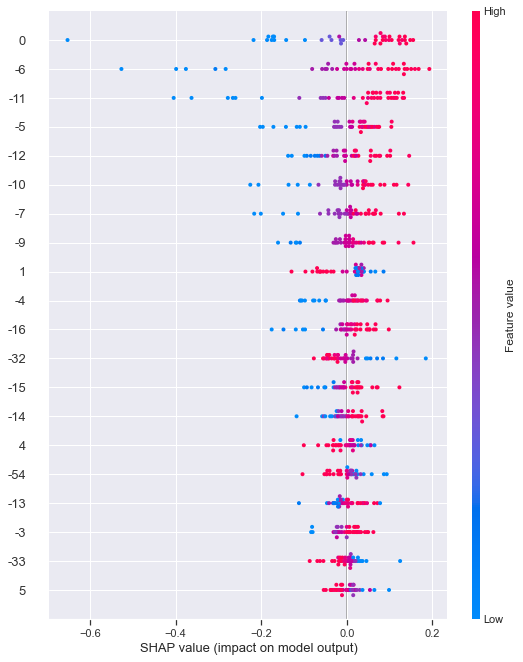

In [74]:
shap.summary_plot(shap_values, X_PCA_promoters, feature_names = X_PCA_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

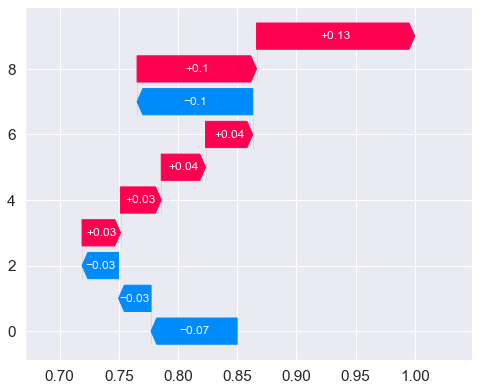

In [75]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_PCA_promoters.columns)

In [76]:
shap.initjs()
shap.plots.force(explainer.expected_value, shap_values, feature_names = X_PCA_promoters.columns)

In [77]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_PCA_promoters.columns)

# Test Organism Predictions

## Test Data

In [46]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\ganji\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\ganji\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\ganji\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\ganji\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [47]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



[Text(0.5, 0, 'Nucleotide Position'),
 Text(0, 0.5, 'Stacking'),
 Text(0.5, 1.0, 'Ganji Test Organism')]

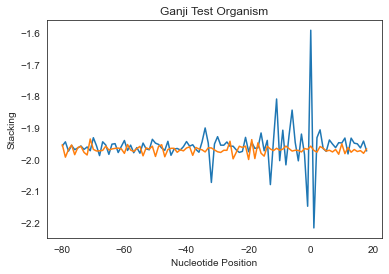

In [48]:
test_plot=sns.lineplot(x='index',y=0,data=test_line)
test_plot=sns.lineplot(x='index',y=0, data= downstream_test_line)

test_plot.set(xlabel ="Nucleotide Position", ylabel = "Stacking", title ='Ganji Test Organism')

## Test Labels

In [49]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [50]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [51]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7820346320346321


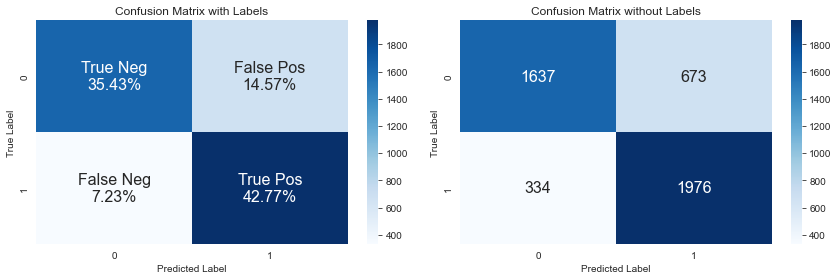

In [52]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [53]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [54]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.8138528138528138, Precision: 0.7843137254901961, Recall: 0.8658008658008658, F1 Score: 0.823045267489712, MCC: 0.6311211570989803, Specificity: 0.7619047619047619
Fold 2/10
 Accuracy: 0.8008658008658008, Precision: 0.7622641509433963, Recall: 0.8744588744588745, F1 Score: 0.814516129032258, MCC: 0.6083573370599227, Specificity: 0.7272727272727273
Fold 3/10
 Accuracy: 0.7922077922077922, Precision: 0.766798418972332, Recall: 0.8398268398268398, F1 Score: 0.8016528925619835, MCC: 0.5870841626065171, Specificity: 0.7445887445887446
Fold 4/10
 Accuracy: 0.7662337662337663, Precision: 0.7188612099644128, Recall: 0.8744588744588745, F1 Score: 0.7890625, MCC: 0.545396898669863, Specificity: 0.658008658008658
Fold 5/10
 Accuracy: 0.803030303030303, Precision: 0.7692307692307693, Recall: 0.8658008658008658, F1 Score: 0.814663951120163, MCC: 0.6108937430276833, Specificity: 0.7402597402597403
Fold 6/10
 Accuracy: 0.7770562770562771, Precision: 0.7285714285714285, Recall: 0

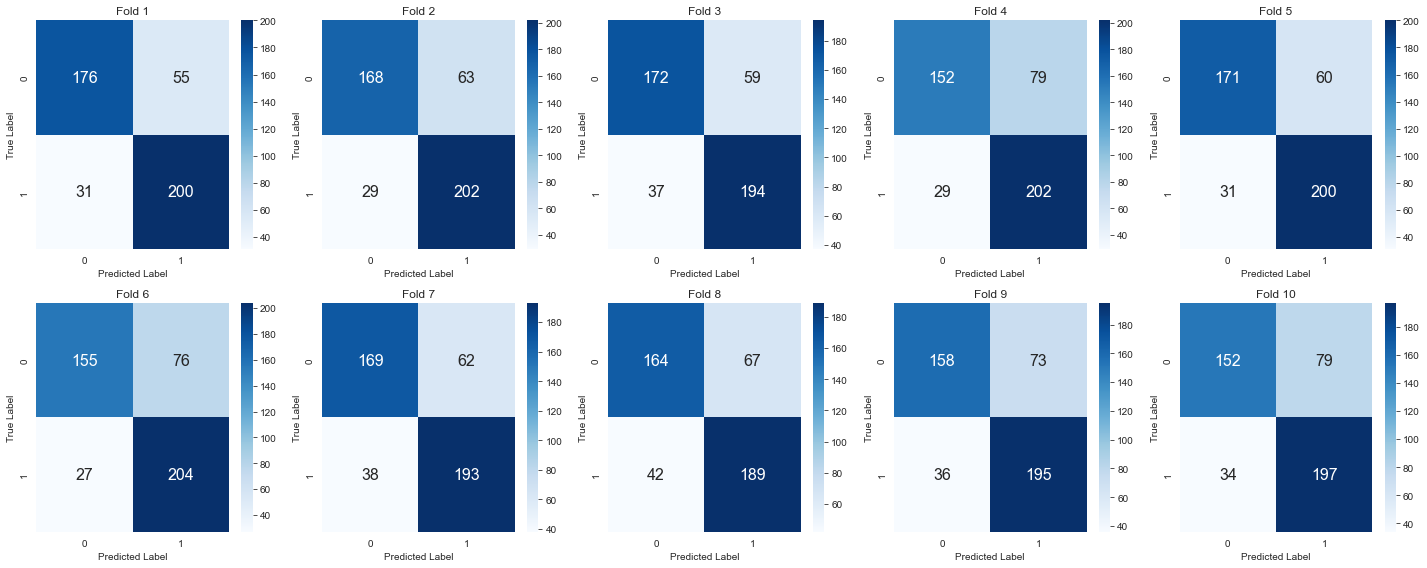

In [55]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [56]:
test_accuracy

[0.8138528138528138,
 0.8008658008658008,
 0.7922077922077922,
 0.7662337662337663,
 0.803030303030303,
 0.7770562770562771,
 0.7835497835497836,
 0.7640692640692641,
 0.7640692640692641,
 0.7554112554112554]

In [57]:
test_precision

[0.7843137254901961,
 0.7622641509433963,
 0.766798418972332,
 0.7188612099644128,
 0.7692307692307693,
 0.7285714285714285,
 0.7568627450980392,
 0.73828125,
 0.7276119402985075,
 0.7137681159420289]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [58]:
test_recall

[0.8658008658008658,
 0.8744588744588745,
 0.8398268398268398,
 0.8744588744588745,
 0.8658008658008658,
 0.8831168831168831,
 0.8354978354978355,
 0.8181818181818182,
 0.8441558441558441,
 0.8528138528138528]

In [59]:
test_specificity

[0.7619047619047619,
 0.7272727272727273,
 0.7445887445887446,
 0.658008658008658,
 0.7402597402597403,
 0.670995670995671,
 0.7316017316017316,
 0.70995670995671,
 0.683982683982684,
 0.658008658008658]

In [60]:
test_f1_score

[0.823045267489712,
 0.814516129032258,
 0.8016528925619835,
 0.7890625,
 0.814663951120163,
 0.7984344422700587,
 0.794238683127572,
 0.7761806981519507,
 0.7815631262525051,
 0.777120315581854]

In [61]:
test_mcc

[0.6311211570989803,
 0.6083573370599227,
 0.5870841626065171,
 0.545396898669863,
 0.6108937430276833,
 0.5670159295506673,
 0.5701853212411477,
 0.5312589233973585,
 0.5350465507873712,
 0.5208000223101698]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [62]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense ganji promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.52,-1.46,-1.76,-2.18,-2.17,-1.95,-2.18,-1.46,-1.95,-1.95,...,-1.76,-1.44,-1.95,-1.95,-1.95,-1.46,-2.18,-1.95,-1.46,1
1,-2.18,-1.95,-1.46,-2.99,-1.42,-2.18,-2.17,-1.52,-1.95,-1.46,...,-1.95,-1.46,-2.99,-1.44,-2.17,-2.18,-1.76,-1.44,-1.95,1
2,-1.95,-2.18,-1.44,-2.17,-1.44,-2.18,-2.17,-1.52,-2.17,-1.52,...,-1.46,-2.99,-1.46,-2.18,-1.42,-2.81,-1.52,-1.95,-1.95,1
3,-2.18,-1.46,-1.52,-1.46,-2.18,-1.95,-1.46,-2.99,-1.46,-1.44,...,-1.44,-1.76,-2.18,-1.46,-2.18,-1.95,-1.95,-2.17,-1.44,1
4,-1.46,-1.76,-2.81,-1.52,-1.95,-1.95,-2.17,-1.52,-2.81,-1.76,...,-1.44,-1.46,-1.76,-2.99,-1.76,-1.76,-1.46,-2.18,-1.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,-1.42,-2.81,-1.95,-1.95,-2.18,-1.76,-1.76,-1.76,-1.46,-1.95,...,-1.95,-2.18,-1.44,-2.17,-2.18,-1.42,-2.81,-2.18,-1.76,0
12164,-1.95,-2.18,-1.46,-1.95,-2.18,-1.42,-1.76,-2.81,-1.44,-2.99,...,-2.81,-1.76,-1.42,-1.76,-2.18,-1.46,-2.99,-1.42,-2.18,0
12165,-1.46,-1.44,-2.18,-2.17,-1.44,-1.76,-1.76,-1.76,-2.18,-1.46,...,-2.81,-1.46,-1.52,-1.95,-2.81,-1.44,-1.46,-2.99,-1.76,0
12166,-1.95,-1.46,-2.18,-2.17,-1.95,-1.44,-2.99,-1.42,-1.76,-1.76,...,-1.76,-1.76,-2.18,-2.81,-1.46,-1.95,-1.95,-1.52,-1.46,0


In [63]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [64]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.6392769104354972, Precision: 0.6328125, Recall: 0.6650246305418719, F1 Score: 0.6485188150520416, MCC: 0.2788853056249116, Specificity: 0.658008658008658
Fold 2/10
 Accuracy: 0.6409202958093673, Precision: 0.6319018404907976, Recall: 0.6765188834154351, F1 Score: 0.6534496431403647, MCC: 0.28250473096938183, Specificity: 0.6134868421052632
Fold 3/10
 Accuracy: 0.6302382908792111, Precision: 0.6210045662100456, Recall: 0.6699507389162561, F1 Score: 0.6445497630331752, MCC: 0.2612423039784918, Specificity: 0.6052631578947368
Fold 4/10
 Accuracy: 0.6729663105998357, Precision: 0.6640746500777605, Recall: 0.7011494252873564, F1 Score: 0.6821086261980831, MCC: 0.3464434246319642, Specificity: 0.5904605263157895
Fold 5/10
 Accuracy: 0.6400986031224322, Precision: 0.6283987915407855, Recall: 0.6842105263157895, F1 Score: 0.6551181102362205, MCC: 0.28135912504032823, Specificity: 0.6447368421052632
Fold 6/10
 Accuracy: 0.628594905505341, Precision: 0.6192660550458715, Re

In [65]:
antisense_accuracy

[0.6392769104354972,
 0.6409202958093673,
 0.6302382908792111,
 0.6729663105998357,
 0.6400986031224322,
 0.628594905505341,
 0.6450287592440427,
 0.6516023007395234,
 0.6398026315789473,
 0.6480263157894737]

In [66]:
antisense_precision

[0.6328125,
 0.6319018404907976,
 0.6210045662100456,
 0.6640746500777605,
 0.6283987915407855,
 0.6192660550458715,
 0.6329305135951662,
 0.6373134328358209,
 0.6295731707317073,
 0.6363636363636364]

In [67]:
antisense_recall

[0.6650246305418719,
 0.6765188834154351,
 0.6699507389162561,
 0.7011494252873564,
 0.6842105263157895,
 0.6661184210526315,
 0.6891447368421053,
 0.7023026315789473,
 0.6792763157894737,
 0.6907894736842105]

In [68]:
antisense_specificity

[0.658008658008658,
 0.6134868421052632,
 0.6052631578947368,
 0.5904605263157895,
 0.6447368421052632,
 0.5960591133004927,
 0.5911330049261084,
 0.6009852216748769,
 0.6009852216748769,
 0.600328947368421]

In [69]:
antisense_f1_score

[0.6485188150520416,
 0.6534496431403647,
 0.6445497630331752,
 0.6821086261980831,
 0.6551181102362205,
 0.6418383518225039,
 0.6598425196850394,
 0.6682316118935837,
 0.6534810126582277,
 0.6624605678233438]

In [70]:
antisense_mcc

[0.2788853056249116,
 0.28250473096938183,
 0.2612423039784918,
 0.3464434246319642,
 0.28135912504032823,
 0.25797353519626764,
 0.29125777372135503,
 0.3048487288861186,
 0.28048070359136656,
 0.29714138379240734]

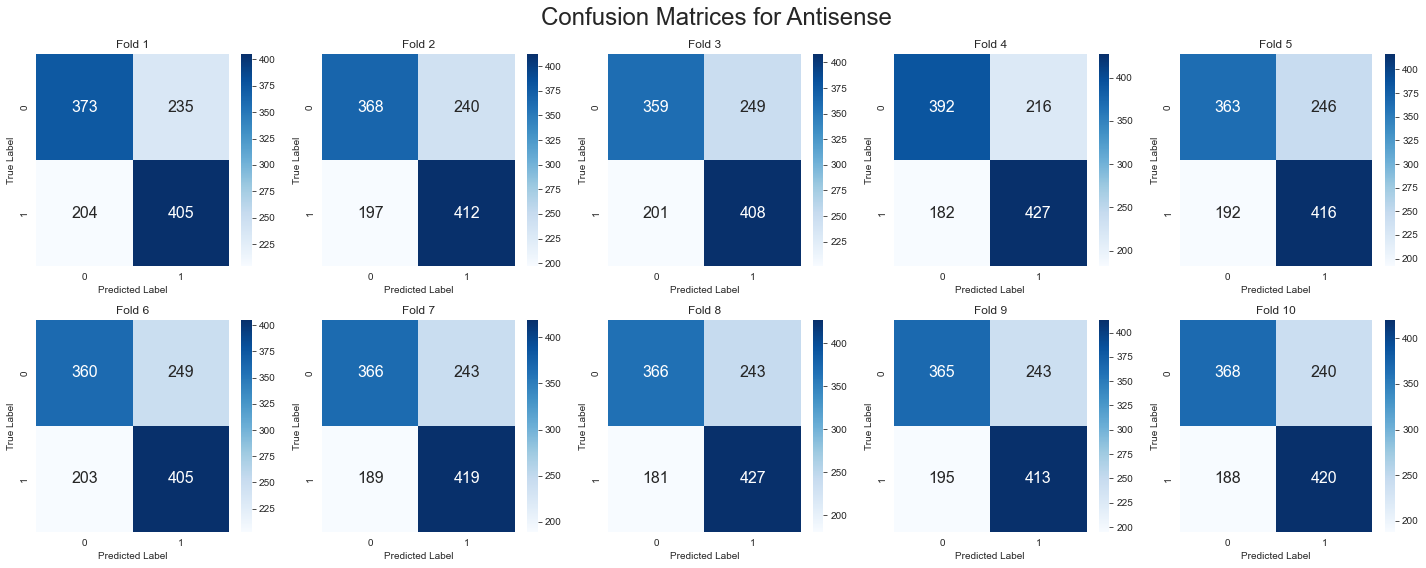

In [71]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

#### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- E.coli
- Helicobactor pylori
- Klebsiella pneumoniae
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Streptomyces coelicolor

In [72]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced ganji promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.46,-2.18,-1.42,-2.81,-1.52,-2.81,-1.42,-1.76,-1.76,-2.18,...,-1.95,-1.46,-2.18,-1.95,-1.95,-1.95,-2.17,-2.18,-1.44,1
1,-2.17,-2.18,-1.44,-1.95,-1.95,-2.17,-1.95,-1.95,-1.52,-2.81,...,-1.44,-1.46,-2.99,-1.46,-1.95,-1.52,-2.17,-1.44,-2.99,1
2,-1.76,-1.76,-2.99,-1.76,-1.44,-2.17,-1.44,-2.99,-1.44,-1.46,...,-1.46,-2.99,-1.44,-1.95,-2.17,-1.95,-1.44,-2.99,-1.46,1
3,-2.81,-1.44,-1.95,-2.81,-1.46,-1.44,-2.18,-2.17,-1.95,-1.52,...,-1.95,-1.95,-2.81,-1.42,-2.18,-1.95,-1.95,-2.17,-2.18,1
4,-1.46,-2.18,-1.46,-1.95,-1.95,-1.52,-1.95,-1.95,-2.17,-2.18,...,-2.81,-1.44,-1.95,-1.46,-2.18,-1.95,-1.95,-1.95,-2.17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,-1.76,-2.99,-1.76,-1.76,-1.44,-2.81,-1.42,-1.76,-2.99,-1.42,...,-1.44,-1.95,-2.81,-1.46,-2.18,-1.76,-1.76,-1.42,-1.76,0
12126,-1.76,-1.42,-2.18,-2.81,-1.42,-2.99,-1.44,-1.95,-1.46,-2.99,...,-1.76,-2.99,-1.42,-2.18,-1.95,-2.81,-1.76,-1.42,-2.99,0
12127,-1.95,-1.46,-2.18,-1.95,-1.46,-2.18,-2.81,-1.76,-1.42,-2.18,...,-1.44,-2.81,-1.42,-2.99,-1.76,-1.44,-2.81,-1.76,-1.44,0
12128,-2.99,-1.76,-1.42,-2.18,-1.95,-1.46,-2.18,-2.81,-1.76,-1.44,...,-2.99,-1.42,-1.76,-2.18,-2.17,-2.18,-1.42,-1.76,-2.99,0


In [73]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [74]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.6801319043693322, Precision: 0.6840336134453782, Recall: 0.6705107084019769, F1 Score: 0.6772046589018302, MCC: 0.36034434583547903, Specificity: 0.6052631578947368
Fold 2/10
 Accuracy: 0.6553998351195384, Precision: 0.6637781629116117, Recall: 0.6309719934102141, F1 Score: 0.6469594594594595, MCC: 0.3112082245045641, Specificity: 0.6897689768976898
Fold 3/10
 Accuracy: 0.6537510305028854, Precision: 0.6530278232405892, Recall: 0.657331136738056, F1 Score: 0.6551724137931034, MCC: 0.3075045130434535, Specificity: 0.6798679867986799
Fold 4/10
 Accuracy: 0.6463314097279472, Precision: 0.6435483870967742, Recall: 0.657331136738056, F1 Score: 0.6503667481662592, MCC: 0.2927170919880436, Specificity: 0.6501650165016502
Fold 5/10
 Accuracy: 0.6323165704863973, Precision: 0.627172195892575, Recall: 0.6540362438220758, F1 Score: 0.6403225806451612, MCC: 0.26485014434472315, Specificity: 0.6353135313531353
Fold 6/10
 Accuracy: 0.640560593569662, Precision: 0.6379870129870

In [75]:
internal_accuracy

[0.6801319043693322,
 0.6553998351195384,
 0.6537510305028854,
 0.6463314097279472,
 0.6323165704863973,
 0.640560593569662,
 0.6488046166529267,
 0.642209398186315,
 0.6586974443528442,
 0.6595218466611706]

In [76]:
internal_precision

[0.6840336134453782,
 0.6637781629116117,
 0.6530278232405892,
 0.6435483870967742,
 0.627172195892575,
 0.637987012987013,
 0.6495016611295681,
 0.63915857605178,
 0.6605351170568562,
 0.661641541038526]

In [77]:
internal_recall

[0.6705107084019769,
 0.6309719934102141,
 0.657331136738056,
 0.657331136738056,
 0.6540362438220758,
 0.6485148514851485,
 0.6452145214521452,
 0.6518151815181518,
 0.6518151815181518,
 0.6518151815181518]

In [78]:
internal_specificity

[0.6052631578947368,
 0.6897689768976898,
 0.6798679867986799,
 0.6501650165016502,
 0.6353135313531353,
 0.6105610561056105,
 0.6326194398682042,
 0.6523887973640856,
 0.6326194398682042,
 0.6655683690280065]

In [79]:
internal_f1_score

[0.6772046589018302,
 0.6469594594594595,
 0.6551724137931034,
 0.6503667481662592,
 0.6403225806451612,
 0.6432078559738135,
 0.6473509933774834,
 0.6454248366013071,
 0.6561461794019933,
 0.656691604322527]

In [80]:
internal_mcc

[0.36034434583547903,
 0.3112082245045641,
 0.3075045130434535,
 0.2927170919880436,
 0.26485014434472315,
 0.2811686902667039,
 0.2976114096665184,
 0.2844856697684127,
 0.31741461683393024,
 0.31907003286693647]

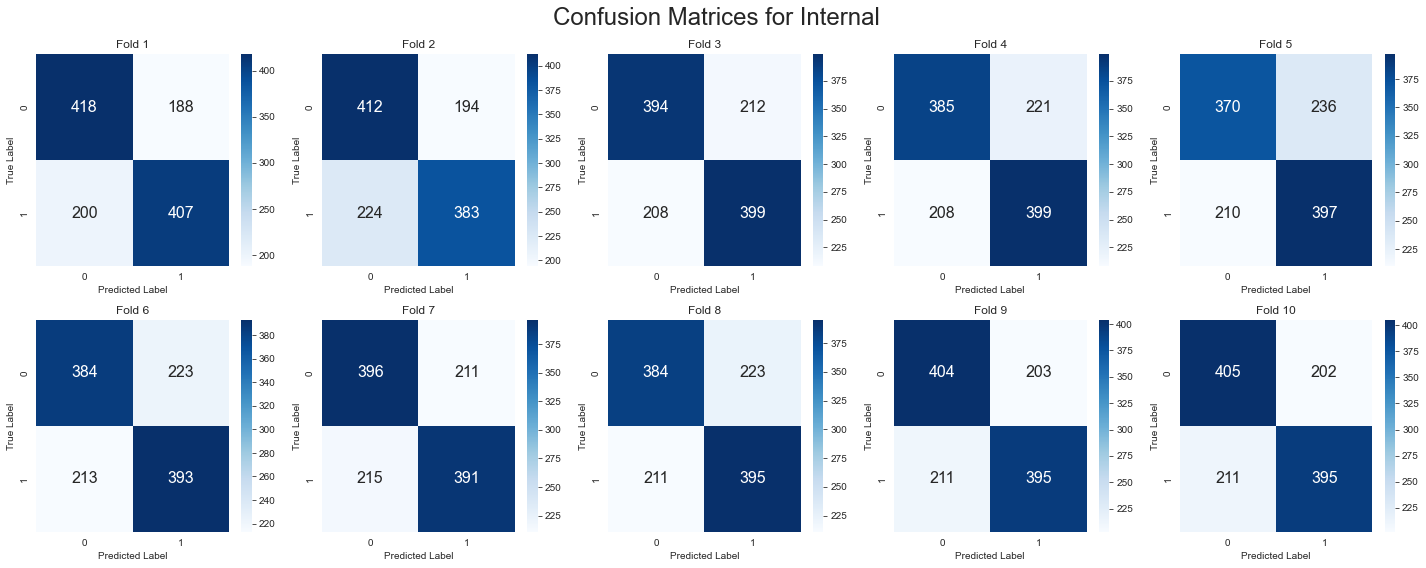

In [81]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
